# Eigendecomposition
Eigendecomposition has a geometric interpretation (axes of rotational invariance), a statistical interpretation (directions of maximal covariance, a dynamical systems interpretation (stable system states), a graph-theoretic interpretation (impact of a node on its network), and many more. 

Eigendecomposition is one of the most important contributions of linear algebra, and this chapter will provide you with an intuitive understanding of eigenvalues and eigenvectors- the results of eigendecomposition of a matrix. 

We'll also learn about diagonalization and more special properties of symmetric matrices. 

In [12]:
import numpy as np
import matplotlib.pyplot as plt

import pprint

## Interpretations of Eigenvalues and Eigenvectors
There are several ways of interpreting these:

### Geometry
An eigenvector means that matrix-vector multiplication acts like scalar-vector multiplication. 

This means that the matrix stretched, but did not rotate- that vector. The vector is an eigenvector of the matrix, and the amount of stretching is the eigenvalue.

The eigenvalue equation:

$\mathbf{A}v=\lambda v$

Note: it does not say that the matrix equals the scalar: just that the effect of the matrix on the vector is the same as the effect of the scalar on that same vector.

This is the eigenvalue equation, and it's another key formula in linear algebra.

### Statistics (PCA)
One of the reasons people use statistics is to identify and quantify relationships between variables. 

In a multivariate dataset that includes dozens or hundreds of variables, bivariate correlation cannot reveal global patterns.

Consider cryptocurrencies- there are tens of thousands of other cryptocurrencies that have various purposes. We can ask whether the entirety of the crypto space operates as a single system (meaning they all go up and down together), or whether there are independent subcategories within that space (some coins or groups of coins change in value independently of the value of other coins).

We can test this hypothesis by performing a PCA on a dataset that contains the prices of various cryptocurrencies over time. If the entire crypto market operates as a single entity, then the screen plot (a graph of the eigenvalues of the dataset's covariance matrix) would reveal that one component accounts for most of the variance of the system, and all other components account for very little variance. 

In contrast, if the crypto market had say, three major subcategories with independent price movements, then we would expect to see three large eigenvalues.

### Noise Reduction
Most datasets contain noise. *Noise* refers to variance in a dataset that is either unexplained (random variation) or unwanted (electrical line noise). There are many ways to attenuate or eliminate noise, and the optimal noise-reduction strategy depends on the nature and origin of the noise and on the characteristics of the signal.

One method of reducing random noise is to identify the eigenvalues and eigenvectors of a system, and 'project out' directions in the data space associated with small eigenvalues. The assumption is that random noise makes a relatively small contribution to the total variance. 'Projecting out' a data dimension means reconstructing a dataset after setting some eigenvalues that are below some threshold to zero.

### Dimension Reduction (Data Compression)
Information Communication technologies create and transmit a huge amount of data, such as pictures and videos. Transmitting data can be time-consuming and expensive, and it is beneficial to compress the data before transmitting it. Compression means to reduce the size of the data while having minimal impact on the quality of the data.

eg- TIFF format image file might be 10MB, while the JPG converted version might be .1 MB while still retaining reasonably high quality.

One way to dimension reduce a dataset is to take its eigendecomposition, drop the eigenvalues and eigenvectors associated with small directions in the data space, and then transmit only the relatively larger eigenvector/value pairs. (SVD is usually used for data compression).

## Finding Eigenvalues
To eigendecompose a square matrix, you first find the eigenvalues and then use each eigenvalue to find its corresponding eigenvector. The eigenvalues are like keys that you insert into the matrix to unlock the mystical eigenvectors.

To find the eigenvalues of a matrix, we start with the eigenvalue equation:

$\mathbf{A}v=\lambda v$<br>
$\mathbf{A}v-\lambda v=0$<br>
$(\mathbf{A}-\lambda\mathbf{I})v=0$

The left-hand side of the second equation has two vector terms, both of which involve $v$. So we factor out the vector. But that leaves us with the subtraction of a matrix and a scalar ($\mathbf{A}-\lambda$), which is not a defined operation in linear algebra. So instead we *shift* the matrix by $\lambda$. That brings us to the third equation.

It means that *the eigenvector is in the null space of the matrix shifted by its eigenvalue*

We can show the concept of the eigenvector as the null space vector of the shifted matrix:

$\tilde{\mathbf{A}}=\mathbf{A}-\lambda \mathbf{I}$<br>
$\tilde{\mathbf{A}}v=0$

This is insightful, as we do not consider $v=0$ to be an eigenvector (trivial solution). This means that the matrix shifted by its eigenvalue is singular because only singular matrices have a non-trivial null space.

The determinant of the matrix is zero, therefore:

$\lvert \mathbf{A}-\lambda\mathbf{I}\rvert=0$

This is the key to finding the eigenvalues: shift the matrix by the unknown eigenvalue $\lambda$ set its determinant to zero, and solve for $\lambda$.

We will see the process for a $2\times 2$ matrix:

$\Bigg \lvert \begin{bmatrix}a&b\\ c&d\end{bmatrix}-\lambda\begin{bmatrix}1&0\\ 0&1\end{bmatrix}\Bigg\rvert=0$
<br>
$\begin{vmatrix}a-\lambda &b\\ c&d-\lambda\end{vmatrix}=0$<br>
$(a-\lambda)(d-\lambda)-bc=0$<br>
$\lambda-(a+d)\lambda +(ad-bc)=0$

The quadratic formula can be applied to find the two $\lambda$ values. Let's look at the logical progression of mathematical concepts established in the book:

- The matrix-vector multiplication acts like scalar-vector multiplication (the eigenvalue equation)
- We set the eigenvalue equation to the zeros vector and factor out common terms.
- This reveals that the eigenvector is in the null space of the matrix shifted by the eigenvalues. We do not consider the zeros vector to be an eigenvector, which means the shifted matrix is singular.
- therefore, we set the determinant of the shifted matrix to zero and solve for the unknown  eigenvalue.

The determinant of an eigenvalue-shifted matrix set to zero is called the *characteristic polynomial* of the matrix.

The characteristic polynomials of an $M\times M$ matrix will have an $\lambda^M$ term. So an $M\times M$ matrix will have $M$ eigenvalues.

In [4]:
matrix = np.array([[1,2],[3,4]])

#get the eigenvalues
evals = np.linalg.eig(matrix)
evals[0]

array([-0.37228132,  5.37228132])

## Finding Eigenvectors
We can find eigenvectors in Python as :

```
evals,evecs = np.linalg.eig(matrix)
```

The eigenvectors are in the columns of the matrix `evecs` and are in the same order as the eigenvalues (that is, the eigenvector in the first column of matrix `evecs` is paried with the first eigenvalue in vector `evals`)

**Eigenvectors are in the columns, not the rows!**
The eigenvectors are stored in the columns of the matrix, not the rows. Remember, the common convention in linear algebra is to assume that vectors are in column orientation.

We need to find the vector $v$ that is in the nullspace of the matrix shifted by $\lambda$. In other words,

$v_i\in N(\mathbf{A}-\lambda_i \mathbf{I})$

Here is an example:

$\begin{bmatrix}1&2\\ 2&1\end{bmatrix} => \lambda_1=3,\lambda_2=-1$

Focus on the first eigenvalue- To reveal its eigenvector, we shift the matrix by 3 and find a vector in its null space.

$\begin{bmatrix}1-3&2\\ 2&1-3\end{bmatrix}=\begin{bmatrix}-2&2\\ 2&-2\end{bmatrix} => \begin{bmatrix}-2&2\\ 2&-2\end{bmatrix}\begin{bmatrix}1\\1\end{bmatrix}=\begin{bmatrix}0\\0\end{bmatrix}$

This means that $[1,1]$ is an eigenvector of the matrix associated with an eigenvalue of 3.

Null-space vectors can be found using Gauss-Jordan to solve a system of equations, where the coefficients matrix is the $\lambda$-shifted matrix and the constants vectors is the zeros vector. That's a way to conceptualize the solution. In practice, more practial ways are used, including QR decomposition and the power method.

### Sign and Scale of Indeterminacy of Eigenvectors
Consider the above example, where we found $[1,1]$ as the eigenvector for the matrix shifted by eigenvalue, 3.

But $[1,1]$ is not the only solution basis vector for the null space. $[4,4]$,$[-5.4,-5.4]$ can be used as well. Any scaled version of vector $[1,1]$ is a basis for that null space. In other words, if $v$ is an eigenvector of the matrix, then so is $\alpha v$ for any real-valued $\alpha$ except zero.

**Eigenvectors are important for their direction, not their magnitude**

The infinity of null space leads to two questions:

- is there one 'best' possible basis vector? There is no best basis vector, but it is convenient to have them normalized (Euclidean norm of one).
- What is the 'correct' sign of an eigenvector? There is none. You can get different eigenvector signs from the same matrix when using different versions of NumPy. Eigenvector sign indeterminacy is just a feature of life. In applications such as PCA, there are principled ways for assigning a sign, but that's just a common convention to facilitate comprehension

## Diagonalizing a Square Matrix
The eigenvalue equation lists one eigenvalue and one eigenvector. This means that an $M\times M$ matrix has $M$ eigenvalue equations:

$\begin{array}\mathbf{A}v_1=\lambda_1v_1\\
.\\.\\.\\
\mathbf{A}v_M = \lambda_M v_M
\end{array}$

We can transform this into something more compact and efficient

The key insight for writing out the matrix eigenvalue equation is that each column of the eigenvectors matrix is scaled by exactly on eigenvalue. We can implement this through postmultiplication by a diagonal matrix (remember it scales the columns).

So instead of storing the eigenvalues in a vector, we store the eigenvalues in the diagonal of a matrix. The following equation shows the form of diagonalization for a $3\times 3$ matrix. 

In the eigenvectors matrix, the first subscript corresponds to the eigenvector, and the second to the eigenvector element. The $@$ symbol is used in place of the numerical values.

$\begin{bmatrix}@&@&@\\ @&@&@\\ @&@&@\end{bmatrix}\begin{bmatrix}v_{11}&v_{21}&v_{31}\\ v_{12}&v_{22}&v_{32}\\ v_{13}&v_{23}&v_{33}\end{bmatrix}=\begin{bmatrix}v_{11}&v_{21}&v_{31}\\ v_{12}&v_{22}&v_{32}\\ v_{13}&v_{23}&v_{33}\end{bmatrix}\begin{bmatrix}\lambda_1&0&0\\ 0&\lambda_2&0\\ 0&0&\lambda_3\end{bmatrix}$

$=\begin{bmatrix}\lambda_1v_{11}&\lambda_2 v_{21}&\lambda_3 v_{31}\\ \lambda_1 v_{12}&\lambda_2 v_{22}&\lambda_3 v_{32}\\ \lambda_1 v_{13}&\lambda_2 v_{23}&\lambda_3 v_{33}\end{bmatrix}$

More generally, the matrix eigenvalue equation- aka the diagonalization of a square matrix- is:

$\mathbf{AV}=\mathbf{V\Lambda}$

We can rearrange this equation to get $\mathbf{A}$ in terms of $\mathbf{V,\Lambda}$ and $\mathbf{V}^{-1}$.

$\mathbf{AV} = \mathbf{V\Lambda}$<br>
$\mathbf{A}=\mathbf{V\Lambda V}^{-1}$, to find the original matrix<br>
$\mathbf{\Lambda} = \mathbf{V}^{-1}\mathbf{AV}$, to find the eigenvalue diagonal matrix

The second equation shows that matrix $\mathbf{A}$ becomes diagonal inside the space of $\mathbf{V}$(that is, $\mathbf{V}$ moves us into the 'diagonal' space and then $\mathbf{V}^{-1}$ gets us back out of the diagonal space). This can be interpreted in the context of basis vectors: the matrix $\mathbf{A}$ is dense in the standard basis, but then we apply a set of transformations ($\mathbf{V}$) to rotate the matrix into a new set of basis vectors (the eigenvectors) in which the information is sparse and represented by a diagonal matrix.  At the end of the equation, we need to get back into the standard basis space, hence the $\mathbf{V}^{-1}$

In [18]:
np.random.seed(34)
A =np.random.randint(10,40,(4,4))
evals,evecs = np.linalg.eig(A)
D = np.diag(evals)
# print(A,D,evecs)
# evecs@D@np.linalg.inv(evecs)
print(np.around(np.linalg.inv(evecs)@A@evecs,1),np.around(D,1),sep='\n\n')

[[ 98.1   0.   -0.   -0. ]
 [ -0.   19.3  -0.   -0. ]
 [ -0.   -0.  -16.3  -0. ]
 [  0.   -0.    0.   -4.2]]

[[ 98.1   0.    0.    0. ]
 [  0.   19.3   0.    0. ]
 [  0.    0.  -16.3   0. ]
 [  0.    0.    0.   -4.2]]


## The Special Properties of Symmetric Matrices
We will see two special properties of symmetric matrices that relate to eigendecomposition.

### Orthogonal Eigenvectors
Symmetric matrices have orthogonal eigenvectors. That means that all eigenvectors of a symmetric matrix are pair-wise orthogonal.

The orthogonal eigenvector property means that the dot product between any pair of eigenvectors is zero, while the dot product of an eigenvector with itself is nonzero (remember, we don't take the zeros vector to be an eigenvector). This can be written as $\mathbf{V}^T\mathbf{V}=\mathbf{D}$ where $\mathbf{D}$ is a diagonal matrix with the diagonals containing the norms of the eigenvectors.

Recall that eigenvectors are important because of their direction- not because of their magnitude. So an eigenvector can have any magnitude we want.

So, we scale all eigenvectors so they have unit length. So now, if all eigenvectors are orthogonal, and have unit length, when we multiply an eigenvectors matrix by its transpose, we get:

$\mathbf{V}^T\mathbf{V}=\mathbf{I}$

So we see that the eigenvectors matrix of a symmetric matrix is an orthogonal matrix. This has multiple implications for DS, including that the eigenvectors are super easy to invert.

We will now prove the orthogonal eigenvectors of symmetric matrices.

The goal of this proof is to show that the dot product between any pair of eigenvectors is zero.

We start with two assumptions:
1. matrix $\mathbf{A}$ is symmetric,
2. $\lambda_1$ and $\lambda_2$ are distinct eigenvalues of $\mathbf{A}$ with $v_1$ and $v_2$ as their corresponding eigenvectors.

$\lambda_1v_1^Tv_2 = (\mathbf{A}v_1)^Tv_2 = v_1^T\mathbf{A}^Tv_2 =v_1^T\lambda_2v_2=\lambda_2v_1^Tv_2$

The terms in the middle are just transformations.

$\lambda_1v_1^Tv_2=\lambda_2v_1^Tv_2$<br>
$\lambda_1v_1^Tv_2-\lambda_2v_1^Tv_2=0$

Both terms contain the dot product $v_1^Tv_2$, which can be factored out. This brings us to:

$(\lambda_1-\lambda_2)v_1^Tv_2=0$

This final equation says that two quantities multiply to produce 0, which means that one or both of those quantities must be zero. $(\lambda_1-\lambda_2)$ cannot equal zero because the eigenvalues are distinct by assumption. Therefore $v_1^Tv_2$ must equal zero, which means that the two eigenvectors are orthogonal.

Thus, the eigenvectors of a nonsymmetric matrix are not constrained to be orthogonal (they will be linearly independent for all distinct eigenvalues)

In [149]:
A = np.random.randn(4,4)
As = A.T@A

#eigendecomposition
evals,evecs = np.linalg.eig(As)

#all pairwise products
evecs.T@evecs

array([[ 1.00000000e+00,  0.00000000e+00,  5.55111512e-17,
        -2.77555756e-17],
       [ 0.00000000e+00,  1.00000000e+00, -1.38777878e-16,
         6.93889390e-17],
       [ 5.55111512e-17, -1.38777878e-16,  1.00000000e+00,
         2.77555756e-16],
       [-2.77555756e-17,  6.93889390e-17,  2.77555756e-16,
         1.00000000e+00]])

### Real-Valued Eigenvalues
A second special property of symmetric matrices is that they have real-valued eigenvalues (and therefore, real-valued eigenvectors).

Complex-valued solutions come in conjugate pairs. That means that if there is a $\lambda_j=a+ib$, there is a $\lambda_k=a-ib$. Their correspondence eigenvectors are also complex conjugate pairs.

Symmetric matrices are guaranteed to have real-valued eigenvalues, and therefore also real-valued eigenvectors. 

## Eigendecomposition of Singular Matrices
Eigendecomposition of singular matrices is perfectly fine.

The one special property of the eigendecomposition of singular matrices is that at least one eigenvalue is guaranteed to be zero. That doesn't mean that the number of non-zero eigenvalues equals the rank of the matrix- that's true for singular values, but not for eigenvalues. But if the matrix is singular, then at least one eigenvalue equals zero.

the converse is also true- every full-rank matrix has zero zero-valued eigenvalues.

One explanation for why that happens is that a singular matrix already has a non-trivial null space, which means that $\lambda=0$ provides a non-trivial solution to the equation $(\mathbf{A}-\lambda\mathbf{I})v=0$. The eigenvector associated with $\lambda=0$ is the normalized vector, which is the linear weighted combination of the columns or rows that produces the zero vector.

the main takeaways of this section are:
1. eigendecomposition is valid for reduced-rank matrices
2. the presence of at least one zero-valued eigenvalue indicated a reduced-rank matrix.


### Quadratic Form, Definiteness, and Eigenvalues

### The Quadratic form of a matrix
Consider the following expression:

$w^T\mathbf{A}w=\alpha$

In other words, we pre- and post-multiply a square matrix by the same vector $w$ and get a scalar.

This is called the *quadratic form* on matrix $\mathbf{A}$

Which matrix and which vector do we use? The idea of the quadratic form is to use one specific matrix and the set of all possible vectors. The important question concerns the signs of $\alpha$ for all possible vectors. 

Here is an example:

$\begin{bmatrix}x&y\end{bmatrix}\begin{bmatrix}2&4\\0&3\end{bmatrix}\begin{bmatrix}x\\ y\end{bmatrix}=2x^2+(0+4)xy+3y^2$

For this possible matrix, there is no possible combination of $x$ and $y$ that can give a negative answer, because the squared terms ($2x^2$ and $3y^2$) will always overpower the cross-term $4xy$ even when $x$ and $y$ is negative. Further, $\alpha$ can be nonpositive only when $x=y=0$.

That is not a trivial result of the quadratic form: for example, the following matrix can have a positive or negative $\alpha$ depending on the values of $x$ and $y$

$\begin{bmatrix}x&y\end{bmatrix}\begin{bmatrix}-9&4\\3&9\end{bmatrix}\begin{bmatrix}x\\ y\end{bmatrix}=-9x^2+(3+4)xy+9y^2$

How can we know whether the quadratic form will produce a positive scalar for all possible vectors? The key comes from considering that a full-rank eigenvectors matrix spans all of $\mathbf{R}^M$, and therefore that every vector in $\mathbf{R}^M$ can be expressed as some linear weighted combination of the eigenvectors. Then we start from the eigenvalue equation and left-multiply it by an eigenvector to return to the quadratic form.

$\mathbf{A}v=\lambda v$<br>
$v^T\mathbf{A}v=\lambda v^Tv$<br>
$v^T\mathbf{A}v=\lambda\lVert v\rVert ^2$

the final equation is key- notice that $\lVert v^Tv\rVert$ is strictly positive, which means that the eigenvalue $\lambda$ entirely determines the sign of the right-hand side of the equation.

The equation uses only one eigenvalue and its eigenvector, but we need to know about any possible vector. The insight is to consider that if the equation is valid for each eigenvector-eigenvalue pair, it is valid for any combination of eigenvector-eigenvalue pairs.

$v_1^T\mathbf{A}v_1=\lambda_1\lVert v_1\rVert^2$<br>
$v_2^T\mathbf{A}v_2=\lambda_2\lVert v_2\rVert^2$<br>
$(v_1+v_2)^T\mathbf{A}(v_1+v_2)=(\lambda_1+\lambda_2)\lVert (v_1+v_2)\rVert^2$<br>
$u^T\mathbf{A}u=\zeta\lVert u\rVert^2$

So, we can set any vector $u$ to be some linear combination of eigenvectors, and some scalar $\zeta$ to be that same linear combination of eigenvalues. Anyway, it doesn't change the principle that the sign of the right-hand side- and therefore also the sign of the quadratic form- is determined by the sign of the eigenvalues

Think about these equations under different assumptions about the signs of the $\lambda$s.

- *All eigenvalues are positive*<br> The right-hand side of the equation is always positive, meaning that $v^T\mathbf{A}v$ is always positive for any vector $v$.
- *Eigenvalues are positive or zero*<br> $v^T\mathbf{A}v$ is nonnegative and will equal zero when $\lambda=0$ (which happens when matrix is singular)
- *Eigenvalues are negative or zero*<br> The quadratic form result will be zero or negative
- *Eigenvalues are negative*<br> The quadratic form result will be negative for all vectors

In [58]:
np.random.seed(33)
A = np.random.randn(4,4)

L,V = np.linalg.eig(A)
x,y = 1,3

v = V[:,x]*3+V[:,y]*3
l = L[x]+L[y]
print(v.T@A@v)
print((l*np.linalg.norm(v)**2)/2)

for x in range(0,4):
    print(V[:,x].T@A@V[:,x],L[x]*np.linalg.norm(V[:,x])**2)

1.0
-5.930390463509718
-5.930390463509715
-3.138415436857403 -3.138415436857402
-0.745840084438789 -0.7458400844387886
0.9953388977754914 0.9953388977754917
0.39355102852952323 0.3935510285295231


## Definiteness
*Definiteness* is a characteristic of a square matrix and is defined by the signs of the eigenvalues of the matrix, which is the same thing as the signs of the quadratic form results.

Definiteness has implications for the invertibility of a matrix as well as advanced data analysis methods such as generalized eigendecomposition.

There are five categories of definiteness:

|Category|Quadratic Form|Eigenvalues|Invertible|
|--------|--------------|-----------|----------|
|Positive definite|Positive|+|Yes|
|Positive semidefinite|Nonnegative|+ and 0| No|
|Indefinite|Positive and Negative|+ and -|Depends|
|Negative semidefinite|Nonpositive|- and 0|No|
|Negative definite|Negative|-|Yes|

Depends in the table means that the matrix can be invertible or singular depending on the numbers in the matrix, not on the definiteness category.

### $\mathbf{A}^T\mathbf{A}$ is Positive (semi)Definite
Any matrix that can be expressed as the product of a matrix and its transpose is guaranteed to be positive definite or positive semi-definite. The combination of these two categories is often written as 'positive semi-definite'

All data covariance matrices are positive semi-definite because they are defined as the data matrix times its transpose. This means that all covariances matrices have nonnegative eigenvalues. The eigenvalues will be all positive when the data matrix is full-rank, and there will be at least one zero-valued eigenvalue if the data matrix is reduced-rank.

The proof that $\mathbf{S}$ is positive semi-definite comes from writing out its quadratic form and applying some algebraic manipulations. 

$w^T\mathbf{S}w=w^T(\mathbf{A}^T\mathbf{A})w$<br>
$=(w^T\mathbf{A}^T)(\mathbf{A}w)$<br>
$=(\mathbf{A}w)^T(\mathbf{A}w)$<br>
$=\lVert \mathbf{A}w\rVert^2$

The point is that the quadratic form of $\mathbf{A}^T\mathbf{A}$ equals the squared magnitude of a matrix times a vector. Magnitudes cannot be negative, and can be zero only when the vector is zero. And if $\mathbf{A}w=0$ for a nontrivial $w$, then $\mathbf{A}$ is singular.

## Generalized Eigendecomposition
The following equation is the same as the fundamental eigenvalue equation:

$\mathbf{A}v=\lambda\mathbf{I}v$

This is obvious because $\mathbf{I}v=v$. Generalized eigendecomposition involves replacing the identity matrix with another matrix.

$\mathbf{A}v=\lambda\mathbf{B}v$

Generalized eigendecomposition is also called *simultaneous diagonalization of two matrices*. The resulting $(\lambda,v)$ is not an eigenvalue-vector of $\mathbf{A}$ alone nor of $\mathbf{B}$ alone. Instead, the two matrices share eigenvalue-vector pairs.

Conceptually, you can think of generalized eigendecomposition as the 'regular' eigendecomposition of a product matrix:

$\mathbf{C}=\mathbf{AB}^{-1}$<br>
$\mathbf{C}v=\lambda v$

This is just conceptual; in practice, generalized eigendecomposition does not require $\mathbf{B}$ to be invertible.

It is not the case that any two matrices can be simultaneously diagonalized. But this diagonalization is possible if $\mathbf{B}$ is positive semi-definite.

Scipy can compute generalized eigendecomposition.

In data science, generalized eigendecomposition is used in classification analysis. In particular, Fisher's linear discriminant analysis is based on generalized eigendecomposition of two data covariance matrices

## Summary
1. Eigendecomposition identifies $M$ scalar/vector pairs of an $M\times M$ matrix. Those pairs of eigenvalue/eigenvector reflect special directions in the matrix and have many applications in data science (PCA being a common one)
2. Eigenvalues are found by assumign that the matrix shifted by an unknown scalar $\lambda$ is singular, setting its determinant to zero (called the characteristic polynomial), and solving for $\lambda$s
3. *Diagonalizing* a matrix means to represent it as $\mathbf{V}^{-1}\mathbf{\Lambda V}$, where $\mathbf{V}$ is a matrix with eigenvectors in the columns an $\Lambda$ is a diagonal matrix with eigenvalues in the diagonal elements.
4. Symmetric matrices have several special properties in eigendecompositions, the most relevant being:
   - all eigenvectors are pair-wise orthogonal.
   - This means that the matrix of eigenvectors is an orthogonal matrix (when the eigenvectors are unit normalized), which in turn means that the inverse of the eigenvectors matrix is its transpose
5. The *definiteness* of a matrix refers to  the signs of its eigenvalues. In Data Science, the most relevant categories are positive (semi) definite, which means that all eigenvalues are either nonnegative or positive
6. A matrix times its transpose is always positive (semi) definite, which means all covariance matrices have non-negative eigenvalues
7. the product of the eigenvalues equals the determinant
8. Not all square matrices can be diagonalized; some have repeated eigenvalues, which has implications for their eigenvectors;

$Av = \lambda v$

$A^{-1}v=\lambda v$

$AA^{-1}v=\lambda Av$

$Iv = \lambda Av$

$\frac{1}{\lambda}Iv=Av$

$Av = \frac{1}{\lambda}Iv$

$Av = \tilde{\lambda}Iv$

Therefore, the eigenvectors will be the same, and the $\lambda$ values will simply be the inverse of the $\lambda$ of the original matrix

In [57]:
# Ex 13-1
A = np.random.randn(5,5)
A = A.T@A

evals, evecs =  np.linalg.eig(A)

Ainv = np.linalg.inv(A)

evali, eveci = np.linalg.eig(Ainv)

In [61]:
# print(np.around(evals,2),np.around(1/evali,2)) #4 5 1 3 2
print(np.around(evecs,1),np.around(evcinv,1),sep='\n')

[[-0.4 -0.3  0.5 -0.7 -0.2]
 [ 0.3 -0.8  0.1  0.4 -0.4]
 [-0.   0.5  0.2  0.1 -0.9]
 [ 0.2 -0.1 -0.8 -0.5 -0.3]
 [-0.8 -0.2 -0.4  0.3 -0.1]]
[[-0.1  0.2  0.4 -0.6 -0.6]
 [ 0.1  0.8 -0.3 -0.3  0.4]
 [ 0.6  0.3  0.6  0.4 -0. ]
 [-0.7  0.5  0.   0.5 -0.3]
 [-0.4 -0.1  0.6 -0.2  0.6]]


Re-create the left-side panel of Figure 13-1, but using the rows of $V$ instead of
columns. Of course you know that this is a coding error, but the results are insightful:
it fails the geometry test that the matrix times its eigenvector only stretches.

[0.98312625 1.79037864]


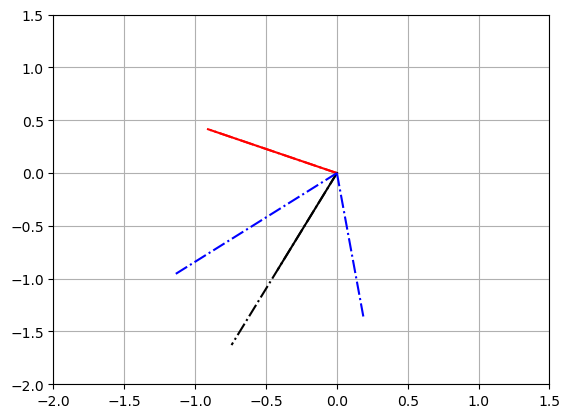

In [130]:
M = np.random.randn(2,2)
M = M.T@M

evals, evecs = np.linalg.eig(M)
E1 = M@evecs
E2 = M@evecs.T
print(evals)

fig, ax = plt.subplots()
ax.plot([0,evecs[0,0]],[0,evecs[1,0]],'r-')
ax.plot([0,evecs[0,1]],[0,evecs[1,1]],'k-')
ax.plot([0,E1[0,0]],[0,E1[1,0]],'r-.')
ax.plot([0,E1[0,1]],[0,E1[1,1]],'k-.')
ax.plot([0,E2[0,0]],[0,E2[1,0]],'b-.')
ax.plot([0,E2[0,1]],[0,E2[1,1]],'b-.')
ax.set_xticks(np.arange(-2,2,.5))
ax.set_yticks(np.arange(-2,2,.5))

plt.grid()
plt.show()

The goal of this exercise is to demonstrate that eigenvalues are inextricably coupled
to their eigenvectors. Diagonalize a symmetric random-integers matrix created using
the additive method (see Exercise 5-9), but randomly reorder the eigenvalues (let’s
call this matrix $\Lambda$) without reordering the eigenvectors.

First, demonstrate that you can reconstruct the original matrix as $V\Lambda V^{−1}$. You can
compute reconstruction accuracy as the Frobenius distance between the original and
reconstructed matrix. Next, attempt to reconstruct the matrix using $\Lambda$. How close is
the reconstructed matrix to the original? What happens if you only swap the two
largest eigenvalues instead of randomly reordering them? How about the two smallest
eigenvalues?

Finally, create a bar plot showing the Frobenius distances to the original matrix for
the different swapping options (Figure 13-3). (Of course, because of the random
matrices—and thus, random eigenvalues—your plot won’t look exactly like mine.)

2.3219011409532515e-30 1.119581745369484 0.6788440793227407 0.4407376660467431


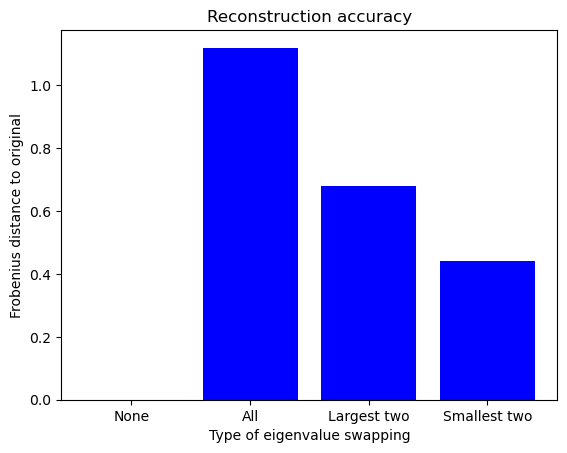

In [225]:
A = np.random.randn(4,4)
A = (A+A.T)/2

b = np.random.permutation(np.arange(0,4))

#eigendecomp 
evals, V = np.linalg.eig(A)

#reordering the eigenvals
order = np.argsort(evals)

O_A = order.copy()
O_L2 = order.copy()
O_S2 = order.copy()

O_A[[np.where(O_A==0)[0],np.where(O_A==1)[0]]] = order[[np.where(order==1)[0],np.where(order==0)[0]]]
O_A[[np.where(O_A==2)[0],np.where(O_A==3)[0]]] = order[[np.where(order==3)[0],np.where(order==2)[0]]]

O_L2[[np.where(O_L2==2)[0],np.where(O_L2==3)[0]]] = order[[np.where(order==3)[0],np.where(order==2)[0]]]

O_S2[[np.where(O_S2==0)[0],np.where(O_S2==1)[0]]] = order[[np.where(order==1)[0],np.where(order==0)[0]]]

#the diagonal eigenvalues matrix
D = np.diag(evals)
LD = np.diag(np.take(evals,O_A))
LL2 = np.diag(np.take(evals,O_L2))
LS2 = np.diag(np.take(evals,O_S2))

#reconstructing A
AD = V@D@np.linalg.inv(V)
AA = V@LD@np.linalg.inv(V)
AL2 = V@LL2@np.linalg.inv(V)
AS2 = V@LS2@np.linalg.inv(V)

#frobenius distance of A
d1 = np.sum((A-AA).flatten()**2)
d2 = np.sum((A-AL2).flatten()**2)
d3 = np.sum((A-AS2).flatten()**2)
d0 = np.sum((A-AD).flatten()**2)
print(d0,d1,d2,d3)

fig,ax = plt.subplots()
ax.bar(x=np.arange(0,4),height = [d0,d1,d2,d3],color='b')
ax.set_xticks(np.arange(0,4),['None','All','Largest two','Smallest two'])
ax.set_title('Reconstruction accuracy')
ax.set_xlabel('Type of eigenvalue swapping')
ax.set_ylabel('Frobenius distance to original')
plt.show()

In [249]:
A = np.random.randint(-14,14,(4,4))
A = A.T@A
ev, evec = np.linalg.eig(A)

# A == np.around(evec@np.diag(ev)@np.linalg.inv(evec),0)

np.around(np.sum(evecs**2,axis=0),0)

np.sum((A-evecs@np.diag(ev)@evecs.T)**2)

2664430084.023555